# Modèle de mélange gaussien (GMM) pour la détection d'anomalies

Le modèle de mélange gaussien (GMM) est un modèle de regroupement probabiliste qui suppose que chaque point de données appartient à une distribution gaussienne. La détection des anomalies consiste à identifier les points de données inhabituels. Le modèle de mélange gaussien (GMM) détecte les valeurs aberrantes en identifiant les points de données dans les régions à faible densité. Dans ce tutoriel, nous utiliserons la bibliothèque sklearn de Python pour mettre en œuvre le modèle de mélange gaussien (GMM) et l'utiliser pour détecter les valeurs aberrantes. Vous apprendrez :

- Comment entraîner un modèle de mélange gaussien (MGM) ?
- Comment prédire les anomalies à partir d'un modèle de mélange gaussien (MGM) en utilisant séparément le seuil de pourcentage et le seuil de valeur ?
- Comment visualiser les résultats de la prédiction d'anomalies ?
- Comment améliorer les performances de prédiction des anomalies ?

## Step 1 : Importer les librairies

Premièrement, nous allons apporter les librairies Python. Nous allons importer make_blobs pour la création de données, pandas et numpy pour le data processing, matplotlib et seaborn pour la visualisation et GaussianMixture pour la modélisation.

In [15]:
# Dataset synthétique

from sklearn.datasets import make_blobs

# Data processing

import numpy as np 
import pandas as pd 

# Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns 

# Modèle

from sklearn.mixture import GaussianMixture

<Axes: xlabel='feature1', ylabel='feature2'>

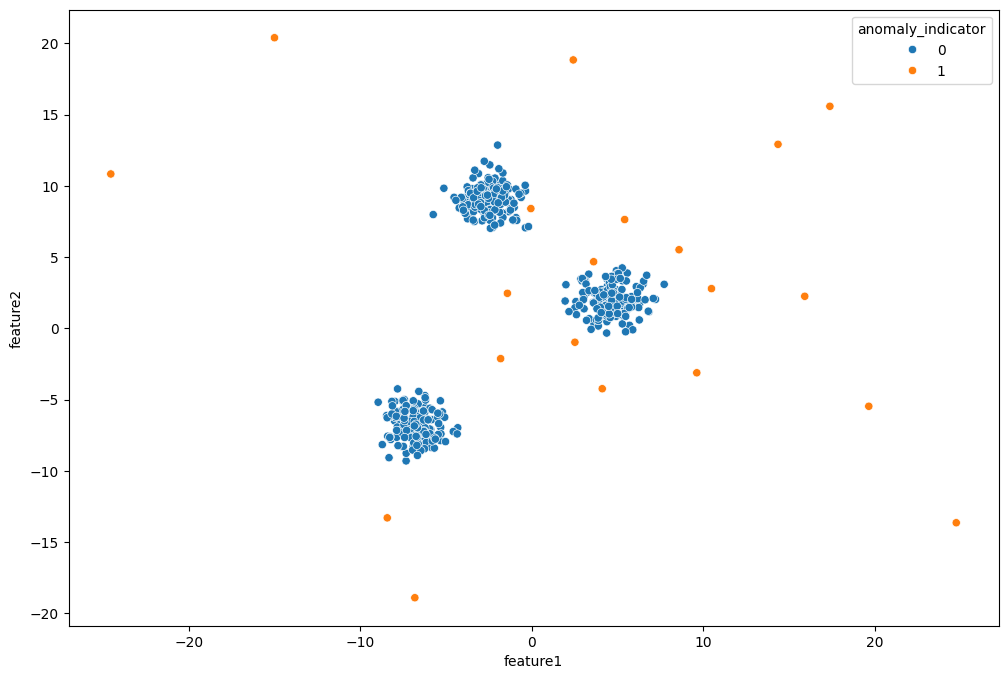

In [16]:
# Create the normal data
X_normal, y_normal = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=1, random_state=42)
df_normal = pd.DataFrame({'feature1': X_normal[:, 0], 'feature2': X_normal[:, 1], 'anomaly_indicator': 0})

# Create the anomaly data
X_anomaly, y_anomaly = make_blobs(n_samples=20, centers=2, n_features=2, cluster_std =10, random_state=0)
df_anomaly = pd.DataFrame({'feature1': X_anomaly[:, 0], 'feature2': X_anomaly[:, 1], 'anomaly_indicator': 1})

# Combine the normal and the anomaly data
df = pd.concat([df_normal, df_anomaly])

# Change figure size
plt.figure(figsize=(12, 8))

# Visualization
sns.scatterplot(data=df, x='feature1', y='feature2', hue='anomaly_indicator')

## Étape 3 : Création d'un modèle de mélange gaussien (MGM ou GMM)

Le modèle de mélange gaussien (GMM) est un modèle non supervisé, et l'ensemble de données de modélisation ne contient que des caractéristiques, de sorte que l'étiquette anomaly_indicator (indicateur d'anomalie) est exclue du modèle.
Une fois l'ensemble de données de modélisation créé, nous lançons le modèle de mélange gaussien (MGM) avec n_composants=3 et n_init=5. n_composants=3 signifie qu'il y a 3 clusters, et n_init=5 signifie que le meilleur modèle parmi 5 valeurs initiales aléatoires est sélectionné pour construire le modèle. random_state est destiné à la reproductibilité du modèle.
Ensuite, le modèle de mélange gaussien (GMM) est utilisé pour ajuster et prédire l'ensemble de données de modélisation X.

In [17]:
# Model dataset

X = df[df.columns.difference(['anomaly_indicator'])]# GMM model
gmm = GaussianMixture(n_components=3, n_init=5, random_state=42)# Fit and predict on the data
y_gmm = gmm.fit_predict(X)

## Étape 4 : Le modèle de mélange gaussien prédit les anomalies en fonction d'un seuil de pourcentage

À l'étape 4, nous utiliserons les résultats du modèle de mélange gaussien (MGM) pour prédire les anomalies en fonction d'un seuil de pourcentage. Ce seuil de pourcentage est généralement obtenu à partir de données historiques ou de connaissances commerciales.

Tout d'abord, le score de chaque échantillon est obtenu à l'aide de la méthode score_samples.
Ensuite, le score est enregistré en tant que colonne dans le cadre de données pandas.
Ensuite, nous obtenons la valeur du score pour le seuil de pourcentage défini pour la détection des anomalies. Dans cet exemple, nous supposons que 4 % des données sont aberrantes, et le score correspondant à 4 % est de -6,56.
 Enfin, une colonne est créée en fonction du seuil. Le point de données est considéré comme aberrant si le score est inférieur au seuil.

In [18]:
# Get the score for each sample
score = gmm.score_samples(X)# Save score as a column
df['score'] = score# Get the score threshold for anomaly
pct_threshold = np.percentile(score, 4)# Print the score threshold
print(f'The threshold of the score is {pct_threshold:.2f}')# Label the anomalies
df['anomaly_gmm_pct'] = df['score'].apply(lambda x: 1 if x < pct_threshold else 0)

The threshold of the score is -6.56


La visualisation montre que la prédiction a permis d'identifier la plupart des valeurs aberrantes, mais qu'il y a quelques faux positifs et faux négatifs à proximité des grappes.

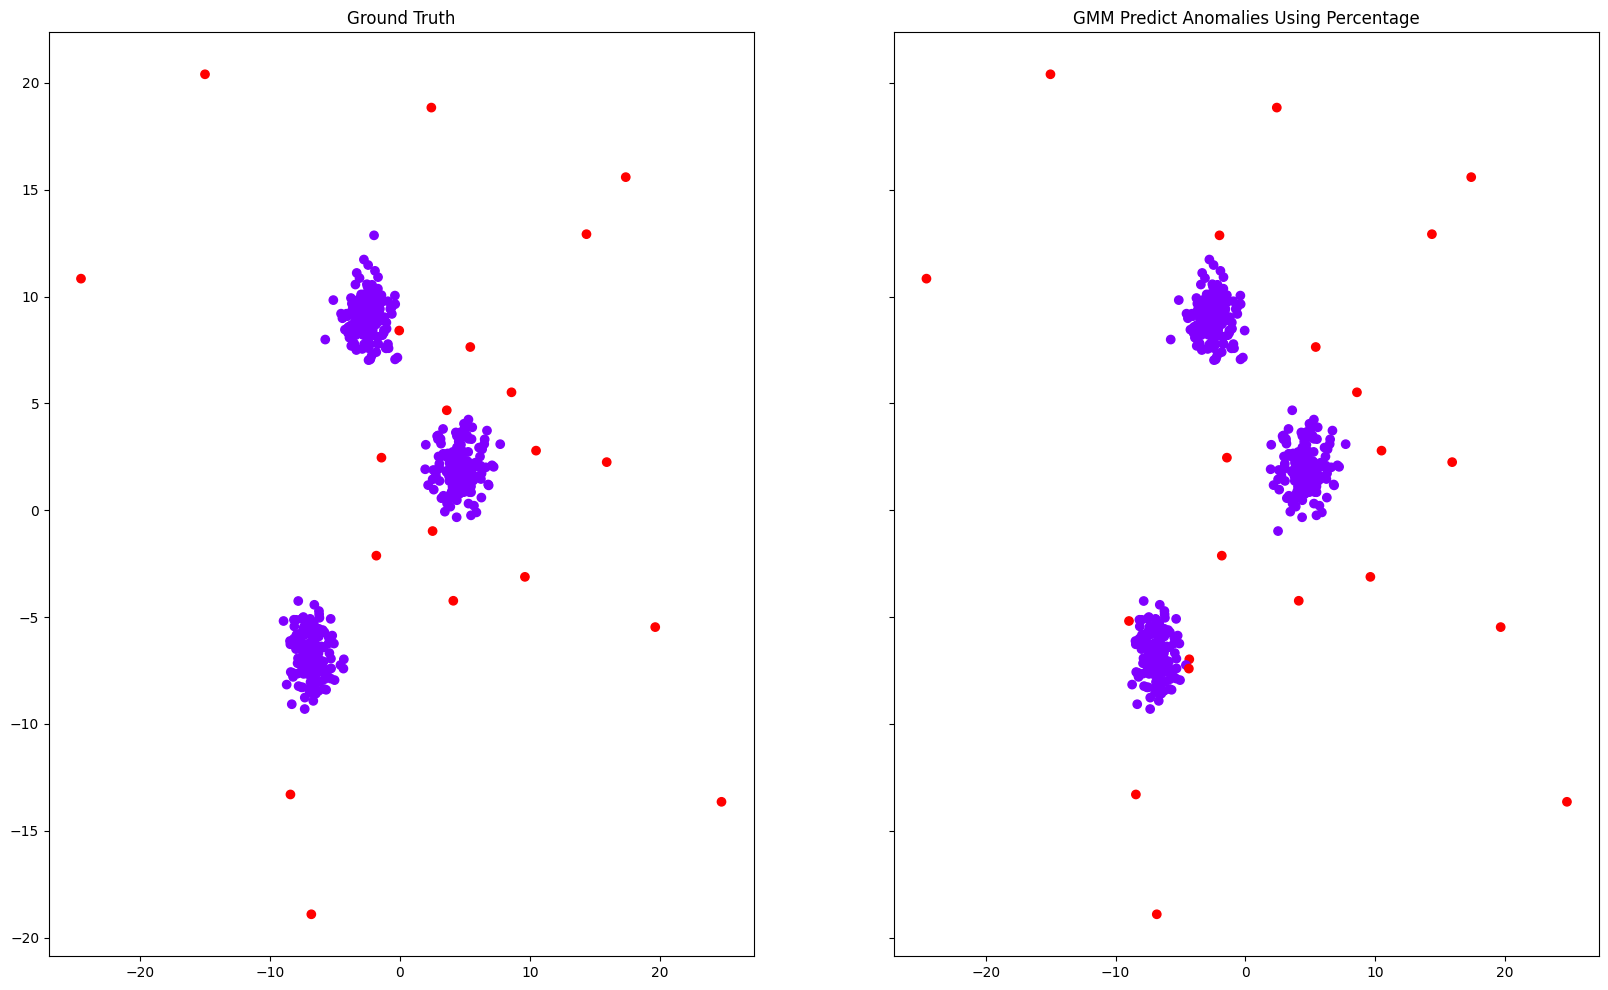

In [19]:
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,12))
# Ground truth
ax0.set_title('Ground Truth')
ax0.scatter(df['feature1'], df['feature2'], c=df['anomaly_indicator'], cmap='rainbow')
# GMM Predictions
ax1.set_title('GMM Predict Anomalies Using Percentage')
ax1.scatter(df['feature1'], df['feature2'], c=df['anomaly_gmm_pct'], cmap='rainbow')

## Étape 5 : prédiction des anomalies par le GMM à l'aide d'un seuil de valeur

À l'étape 5, nous utilisons les résultats du modèle de mélange gaussien (MGM) pour prédire les anomalies sur la base d'un seuil de valeur. Ce seuil de valeur est obtenu en observant la distribution des scores.

La visualisation montre que la plupart des scores sont supérieurs à -5,5. Nous avons donc fixé la valeur seuil à -5,5.

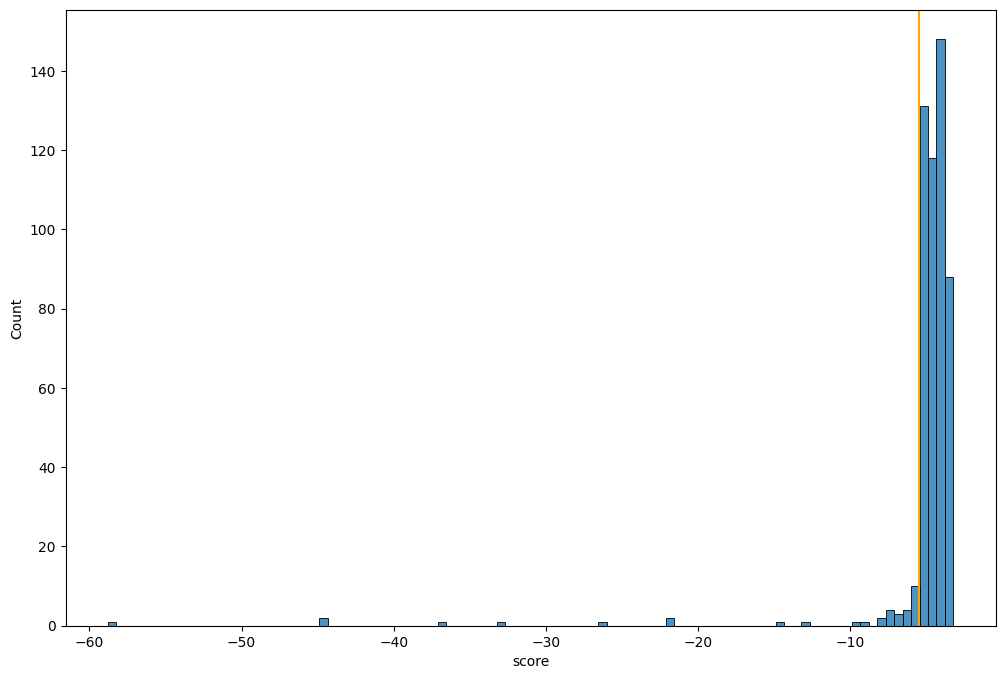

In [20]:
# Change figure size
plt.figure(figsize=(12, 8))# Check score distribution
sns.histplot(df['score'], bins=100, alpha=0.8)# Threshold value
plt.axvline(x=-5.5, color='orange')

Après avoir déterminé le seuil de prédiction des anomalies, une nouvelle colonne est créée pour enregistrer les résultats de la prédiction.

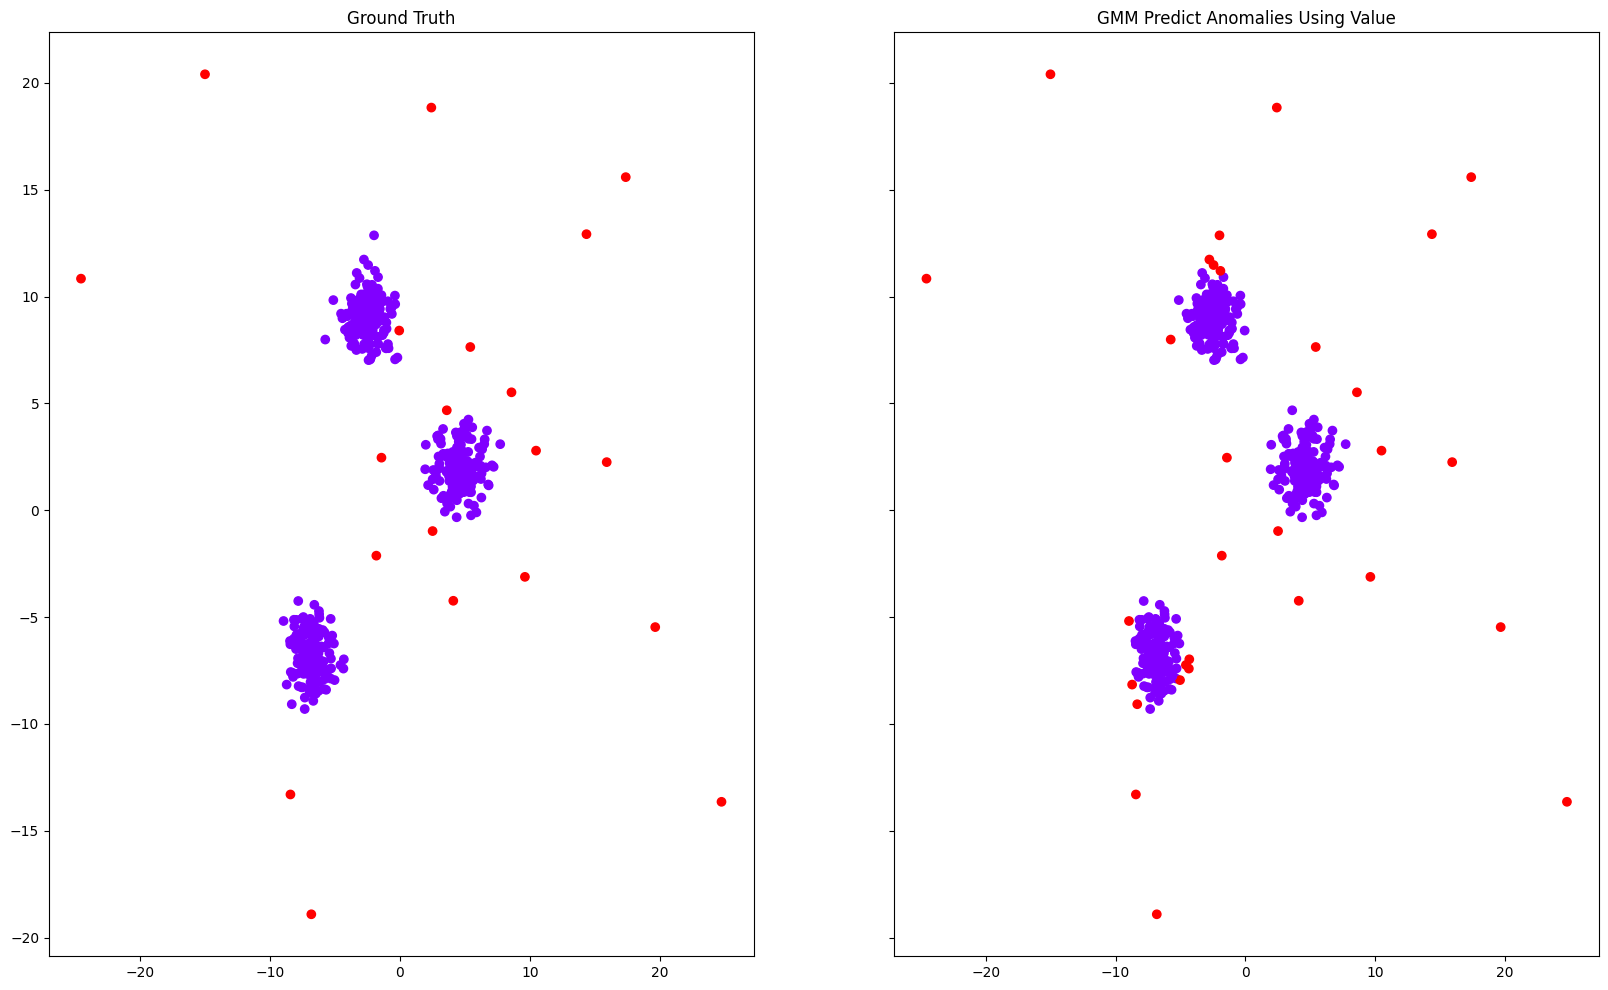

In [21]:
# Get the score threshold for anomaly
value_threshold = -5.5# Label the anomalies
df['anomaly_gmm_value'] = df['score'].apply(lambda x: 1 if x < value_threshold else 0)# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,12))
# Ground truth
ax0.set_title('Ground Truth')
ax0.scatter(df['feature1'], df['feature2'], c=df['anomaly_indicator'], cmap='rainbow')
# GMM Predictions
ax1.set_title('GMM Predict Anomalies Using Value')
ax1.scatter(df['feature1'], df['feature2'], c=df['anomaly_gmm_value'], cmap='rainbow')

La visualisation montre que la plupart des valeurs aberrantes sont identifiées correctement, mais qu'il y a quelques faux positifs près des clusters.

## Étape 6 : Optimisation de la détection d'anomalies par le MGM

À l'étape 6, nous abordons deux méthodes permettant d'améliorer les performances de la détection d'anomalies.

La première méthode consiste à améliorer les performances du modèle de mélange gaussien (GMM) en ajustant les hyperparamètres. Les scores des échantillons étant calculés sur la base du modèle de mélange gaussien, un meilleur modèle est susceptible de conduire à de meilleurs scores pour la détection des anomalies.
La deuxième méthode consiste à optimiser le seuil en fonction de la vérité de terrain. Prenons l'exemple de la détection des fraudes. Après avoir identifié les valeurs aberrantes sur la base d'un certain seuil, on peut examiner des cas spécifiques et décider s'il s'agit d'une véritable fraude. S'il y a beaucoup de faux positifs, nous pouvons abaisser le seuil, et s'il y a beaucoup de faux négatifs, nous pouvons l'augmenter.

## Résumé

Dans ce tutoriel, nous avons expliqué comment utiliser le modèle de mélange gaussien (GMM) pour détecter les valeurs aberrantes. Vous avez appris :
- Comment former un modèle de mélange gaussien (MGM) ?
- Comment prédire les anomalies à partir d'un modèle de mélange gaussien (GMM) en utilisant séparément le seuil de pourcentage et le seuil de valeur ?
- Comment visualiser les résultats de la prédiction d'anomalies ?
- Comment améliorer les performances de prédiction des anomalies ?